# Analysis of Transcription Regulatory Networks (TRNs)

In [5]:
import init
import common.constants as cn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
from common_python.plots import util_plots
from plots import util_plots as xutil_plots

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
PROVIDER = DataProvider()
PROVIDER.do()

In [ ]:
TRINARY = TrinaryData(is_averaged=False, is_dropT1=False)

In [4]:
PROVIDER.df_trn_signed.head()

,tf,GENE_ID,sign
0,Rv0022c,Rv0029,1
1,Rv0022c,Rv0030,1
2,Rv0022c,Rv0031,1
3,Rv0022c,Rv0069c,1
4,Rv0022c,Rv0070c,1


In [6]:
dfg_signed = PROVIDER.df_trn_signed.groupby(cn.GENE_ID)

In [8]:
ser = dfg_signed.count()[cn.SIGN]
ser.head()

GENE_ID
Rv0001    3
Rv0002    4
Rv0003    4
Rv0004    3
Rv0005    2
Name: sign, dtype: int64

Text(0.5, 0, 'No. Transcription Factors')

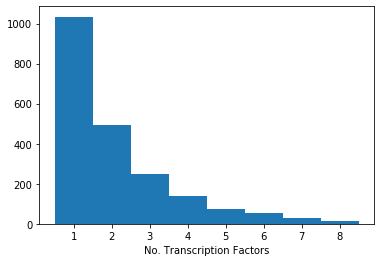

In [19]:
xv = [v - 0.5 for v in range(1,10)]
plt.hist(ser.values, bins=xv)
plt.xlabel("No. Transcription Factors")

In [21]:
count = len(PROVIDER.df_trn_signed.groupby(cn.TF))
print("Number of networks: %d" % count)

Number of networks: 136


## Visualize Network Relationships
Use networkx to plot the relationship between networks. Network $N_1$ precedes $N_2$ if the TF for $N_2$ is in $N_1$. Networks are labelled by their TF.